<div style="text-align: center;"><h1>Stock Market Analysis & Prediction With LSTM  📈</h1></div>

### Introduction: 
<div align="justify">In this notebook, we will investigate into stock market data, focusing on stocks such as Apple, Amazon, Google, and Microsoft. We'll use the yfinance library to retrieve stock information and visualize various aspects using Seaborn and Matplotlib. We'll also explore different methods for analyzing stock risk based on historical performance and employ Long Short Term Memory (LSTM) to predict future stock prices.</div></br>
<div align="justify">Time Series Data Overview:</div> </br>

<div align="justify">Time series data is a sequence of data points collected at regular time intervals to track changes over time. Time series data consists of data points indexed in chronological order.</div> 

### Objectives:  
<div align="justify">This project focuses on analyzing historical stock market data and predicting future stock prices using Long Short-Term Memory (LSTM) networks. The objective is to build and evaluate an LSTM model to forecast stock prices based on historical data, helping to identify trends and make informed investment decisions.</div><br>

We will address the following cases in this notebook:

- Change in stock price over time
- Average daily return of the stock
- Moving averages for the different stocks
- Stocks correlation with each other
- Risk associated with investing in a particular stock
- Prediction of future stock behavior (Using LSTM)


### Analysis Approach:    
<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach.</div> <br>

- Data Collection: Gathering and preprocessing historical stock market data
- Exploratory Data Analysis (EDA): Exploring the dataset to identify patterns, trends, and relationships in the dataset
- Visualizations: It includes creating visual representations of the data to facilitate a better understanding of the insights, trends, and relationships
- Model Development: Building and training an LSTM network for stock price forecasting
- Evaluation: Assessing model performance using evaluation metrics
- Prediction: Generating and analyzing forecasts for future stock prices

### Finding The Data:

<div align="justify">The initial step involves acquiring and loading the data into memory. We will source our stock data from Yahoo Finance, a comprehensive resource for financial market data and investment tools. To retrieve this data, we'll use the yfinance library, which provides a straightforward and Pythonic approach to downloading market data from Yahoo.</div>

### Change In Stock Price Over Time:

<div align="justify">In this section, we’ll cover how to request stock information using pandas and analyze fundamental attributes of a stock.</div>

In [1]:
!pip install -q yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Necessary Libraries:

In [2]:
# Importing Necessary Libraries:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# To set visualization styles:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo Finance:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# To override pandas_datareader with yfinance functionality:
yf.pdr_override()

# For handling dates and timestamps:
from datetime import datetime

# List of stocks for analysis:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# To set up end and start dates for data retrieval:
end = datetime.now()  # Current date and time
start = datetime(end.year - 1, end.month, end.day)  # One year ago from today

# To download stock data for each company in the list:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# To create a list of company DataFrames and their corresponding names:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# To add a column for the company name to each DataFrame:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# To concatenate all company DataFrames into a single DataFrame:
df = pd.concat(company_list, axis=0)

# To display the last 5 rows of the combined DataFrame:
df.tail(5)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,AMAZON
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,AMAZON
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,AMAZON
2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,AMAZON
2024-07-31,185.050003,187.940002,184.460007,186.979996,186.979996,41498700,AMAZON


#### Observations: Upon examining the content of our data, we observe that it consists of numeric values with dates as the index.

### Descriptive Statistics of the Data: 
<div align="justify">The .describe() method provides descriptive statistics that summarize the central tendency, dispersion, and distribution shape of a dataset, excluding NaN values.This method analyzes both numeric and object series, as well as DataFrame columns with mixed data types. The output will vary based on the data provided. For more details, refer to the notes below.</div>

In [3]:
# To display summary statistics for the AAPL stock data:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,186.927500,188.556508,185.343452,186.979127,186.590959,6.046008e+07
std,15.805589,15.973106,15.452850,15.736220,15.873477,2.464094e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801846,4.727445e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502815,5.397365e+07
75%,192.592503,194.017498,191.494999,192.542500,192.275002,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


#### Note: We have only 255 records in one year because weekends are not included in the data.

### Information About the Data:
<div align="justify">The .info() method provides details about a DataFrame, including the index dtype, column names, non-null counts, and memory usage.</div>

In [4]:
# To display general information about the AAPL stock data:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-01 to 2024-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### Closing Price:
<div align="justify">The closing price is the final price at which a stock is traded during regular trading hours. It serves as the primary benchmark for investors to monitor a stock's performance over time.</div>

### Visualizations:

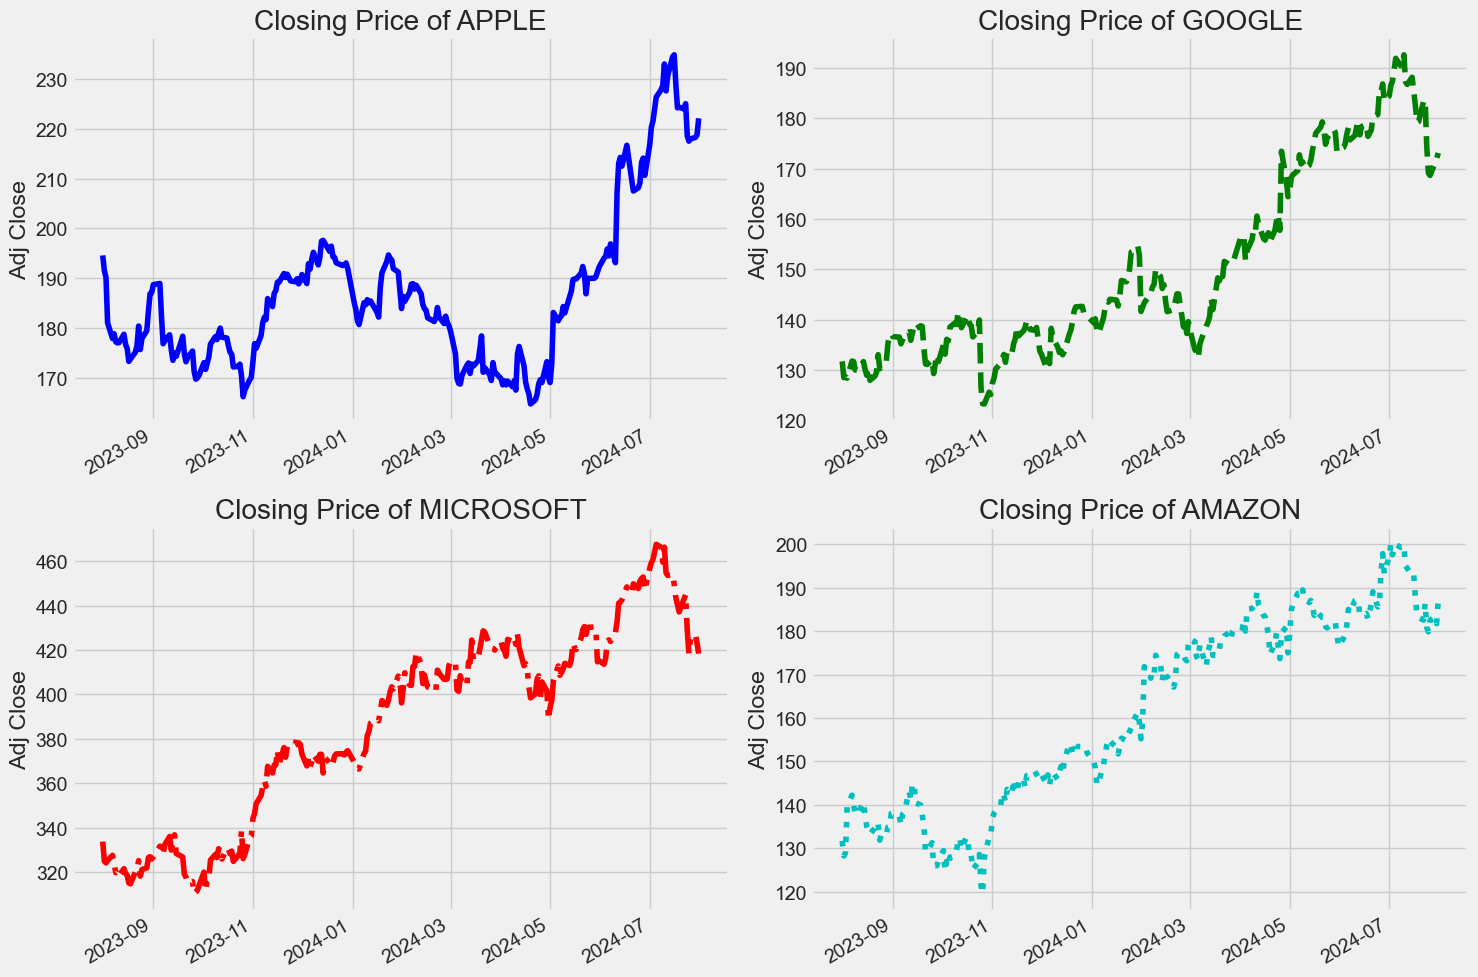

In [5]:
# To set up the figure size and layout adjustments:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# To define colors and styles for each company's plot:
colors = ['b', 'g', 'r', 'c']  # Blue, Green, Red, Cyan
line_styles = ['-', '--', '-.', ':']  # Solid, Dashed, Dash-dot, Dotted

# To plot the adjusted closing price for each company:
for i, (company, color, line_style) in enumerate(zip(company_list, colors, line_styles), 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=color, linestyle=line_style)
    plt.ylabel('Adj Close')
    plt.xlabel(None)  # Remove x-axis label to prevent clutter
    plt.title(f"Closing Price of {company_name[i - 1]}")

# To adjust layout to ensure subplots fit within the figure:
plt.tight_layout()
plt.show()


### Volume of Sales:
<div align="justify">Volume refers to the quantity of an asset or security that is traded over a specified period, often within a single day. For example, stock trading volume represents the number of shares traded between the daily open and close. Trading volume, along with its variations over time, is a crucial metric for technical traders.</div>

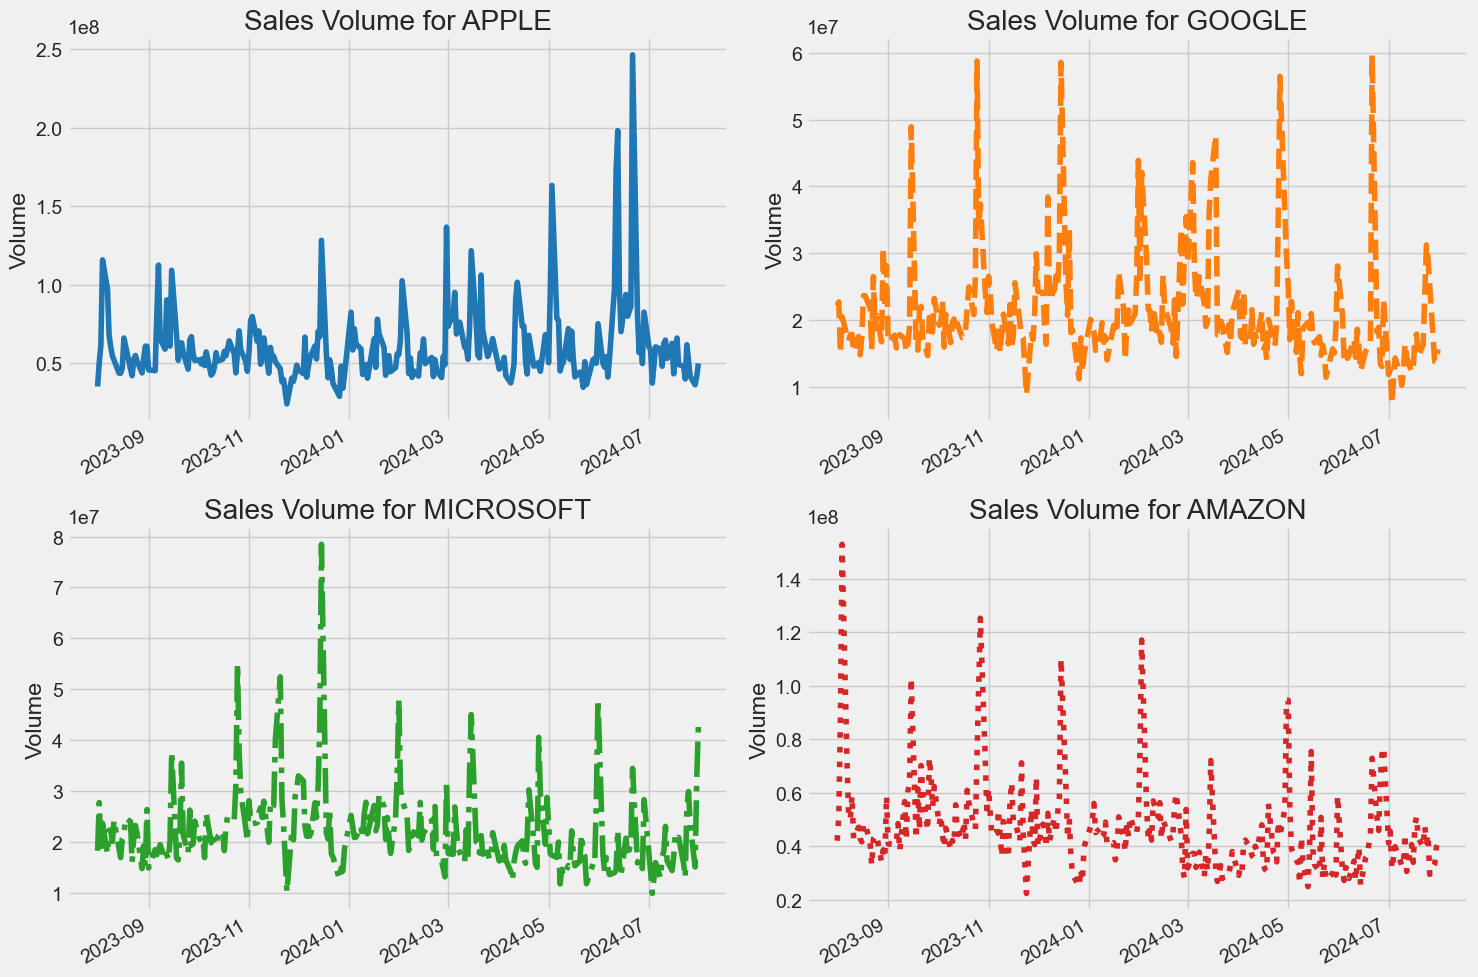

In [6]:
# To set up the figure size and layout adjustments:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# To define colors and styles for each company's plot:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different color codes
line_styles = ['-', '--', '-.', ':']  # Solid, Dashed, Dash-dot, Dotted

# To plot the total volume of stock traded for each company:
for i, (company, color, line_style) in enumerate(zip(company_list, colors, line_styles), 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=color, linestyle=line_style)
    plt.ylabel('Volume')
    plt.xlabel(None)  # Remove x-axis label to prevent clutter
    plt.title(f"Sales Volume for {company_name[i - 1]}")

# To adjust layout to ensure subplots fit within the figure:
plt.tight_layout()
plt.show()


#### We’ve examined the visualizations for the closing price and daily trading volume, let’s proceed with calculating the moving average for the stock.

### Moving Average Of The Various Stocks:

<div align="justify">The moving average (MA) is a fundamental technical analysis tool that smooths out price data by calculating a continuously updated average price. This average is computed over a specified period, such as 10 days, 20 minutes, 30 weeks, or any other timeframe selected by the trader.</div>

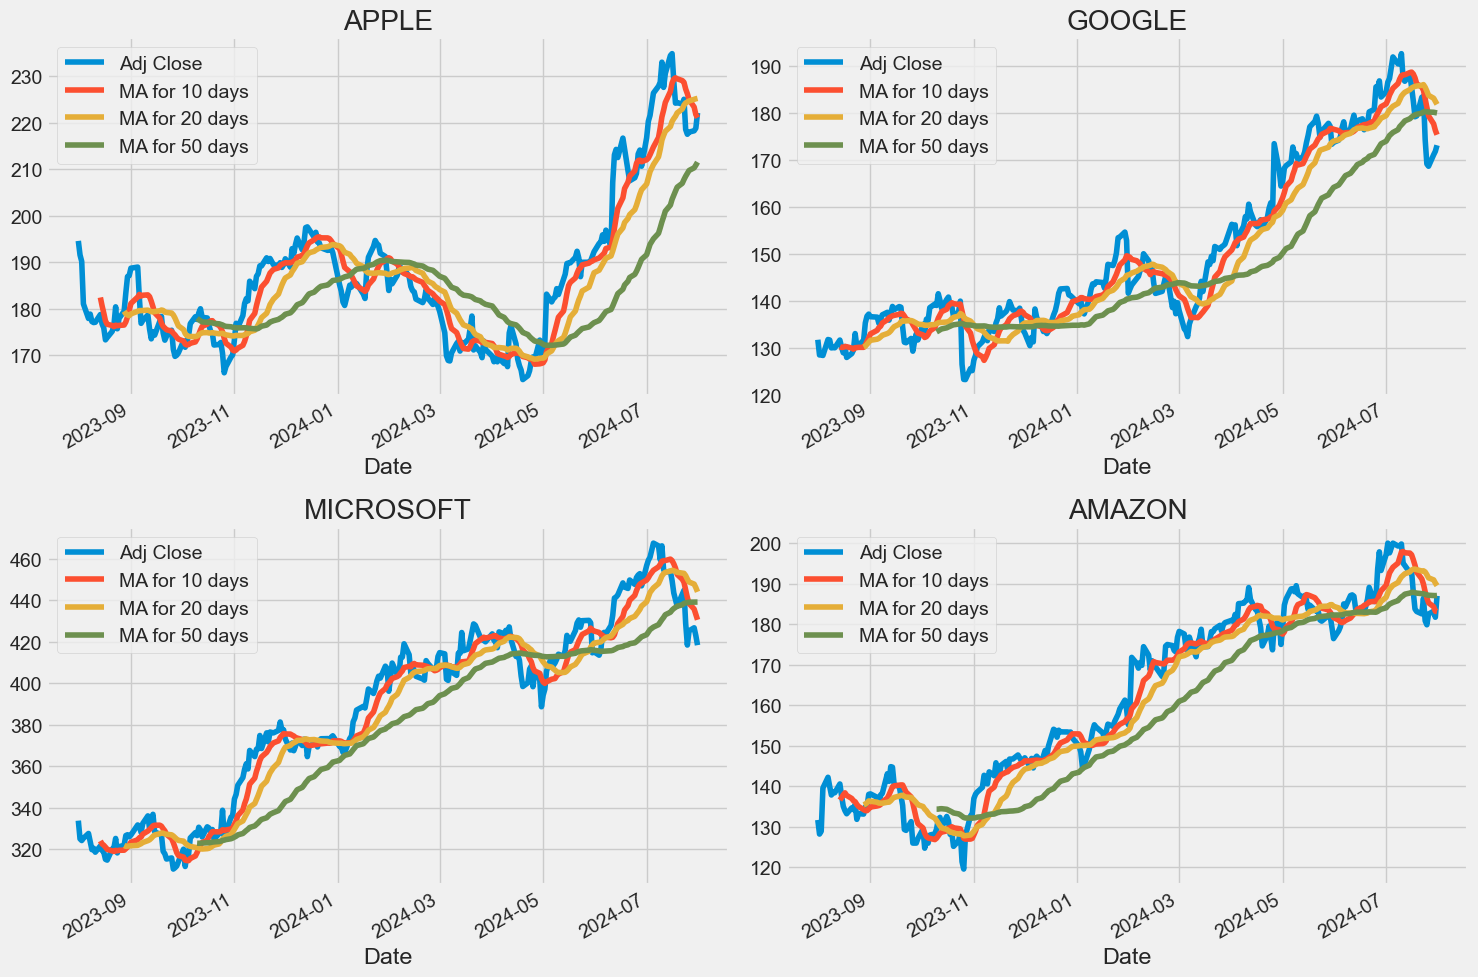

In [7]:
# To define the moving average days:
ma_day = [10, 20, 50]

# To calculate moving averages for each company:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# To set up subplots:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# To plot Adjusted Close and Moving Averages for each company:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0], title='APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1], title='GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0], title='MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1], title='AMAZON')

# To adjust layout for better fit and appearance:
fig.tight_layout()
plt.show()

#### Observations: The graph indicates that 10-day and 20-day moving averages are optimal for measuring trends, as they effectively capture the underlying patterns in the data while minimizing noise.

### Daily return of the stock on average:

<div align="justify">Having completed the baseline analysis, let's delve deeper by analyzing the stock's risk. To do this, we'll need to examine the daily changes in the stock's value rather than just its absolute price. We will use pandas to calculate the daily returns for Apple stock.</div>

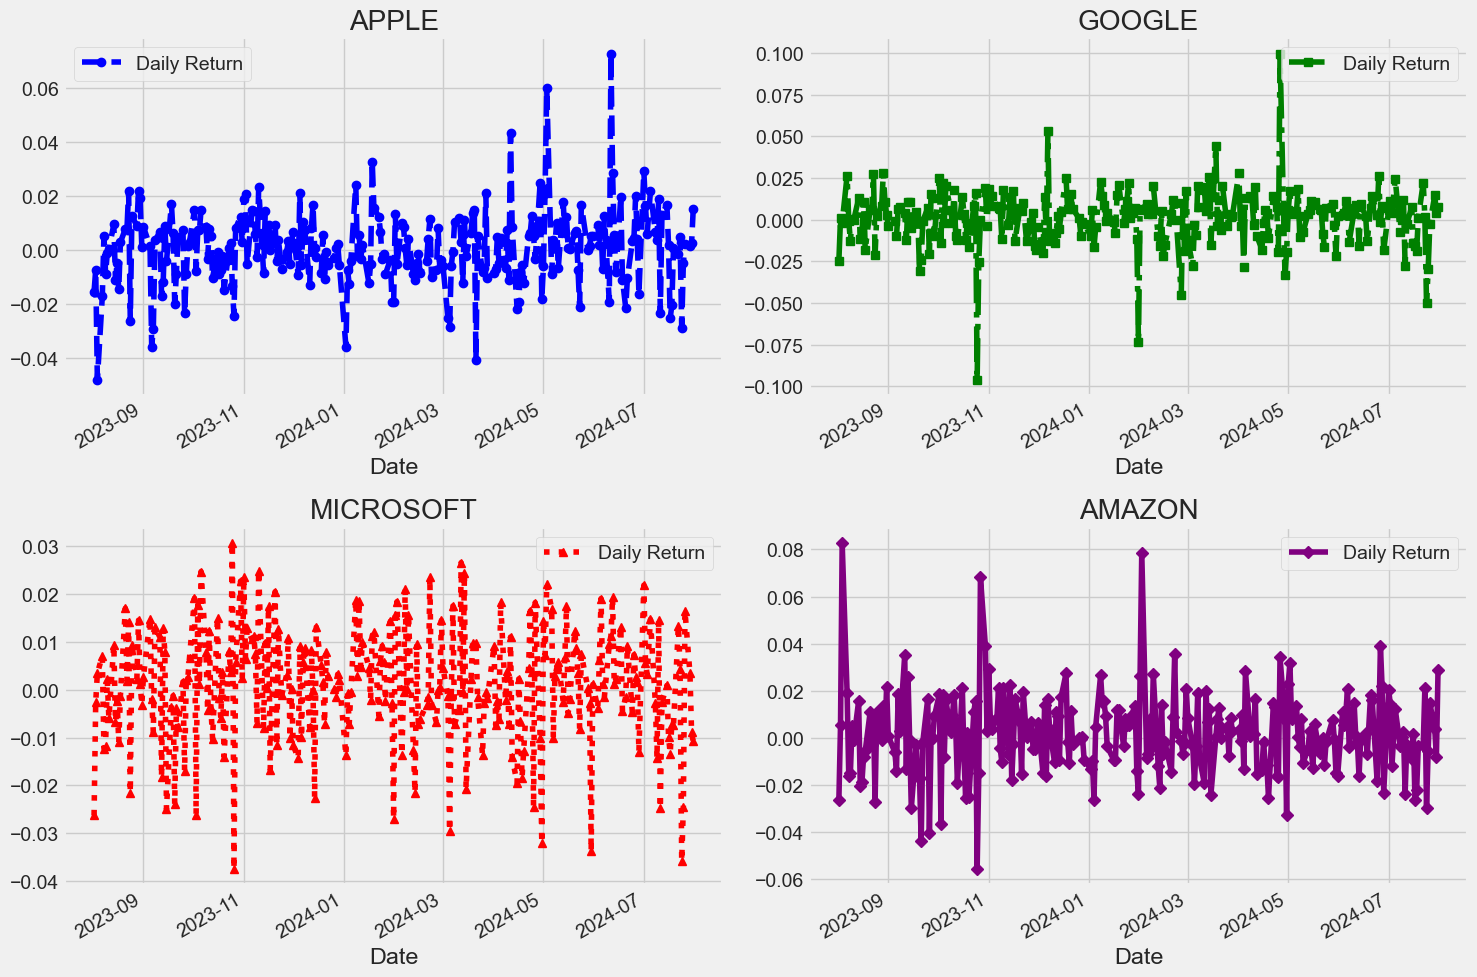

In [8]:
# To calculate daily returns for each company:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To set up subplots:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# To define colors and styles for each company's plot:
colors = ['blue', 'green', 'red', 'purple']
line_styles = ['--', '-.', ':', '-']
markers = ['o', 's', '^', 'D']

# To plot daily returns for each company:
AAPL['Daily Return'].plot(ax=axes[0,0], color=colors[0], linestyle=line_styles[0], marker=markers[0], legend=True)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], color=colors[1], linestyle=line_styles[1], marker=markers[1], legend=True)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], color=colors[2], linestyle=line_styles[2], marker=markers[2], legend=True)
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], color=colors[3], linestyle=line_styles[3], marker=markers[3], legend=True)
axes[1,1].set_title('AMAZON')

# To adjust layout to ensure subplots fit within the figure:
fig.tight_layout()
plt.show()


### Histogram Plot:

Let's get an overall view of the average daily return by plotting a histogram. We'll use seaborn to create both a histogram and a KDE plot on the same figure.

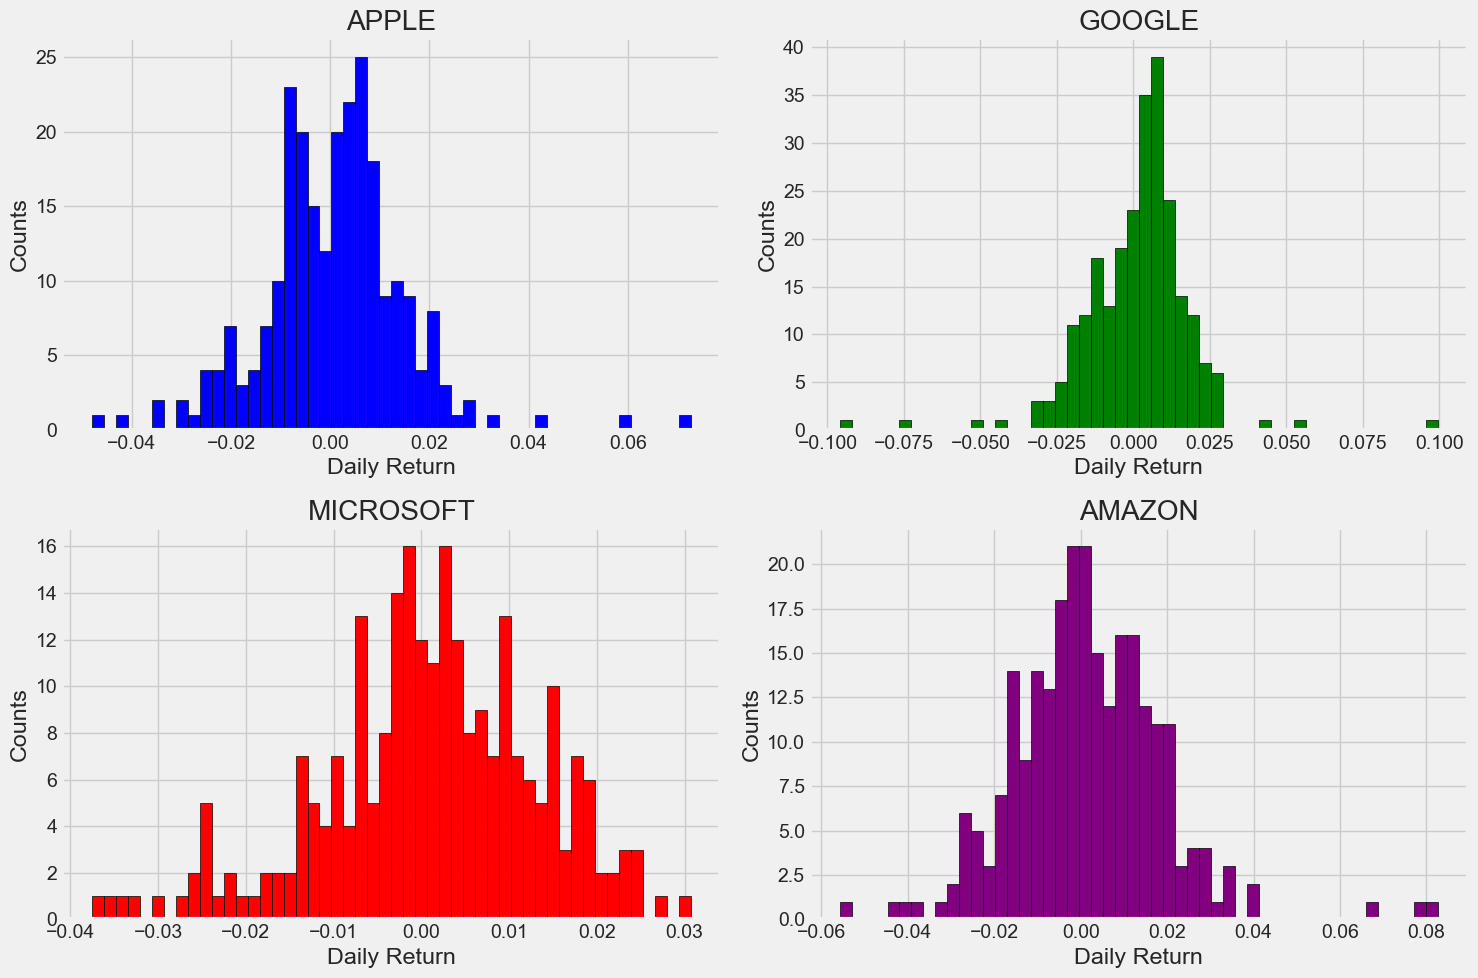

In [9]:
# To set up the figure size:
plt.figure(figsize=(15, 10))

# To define colors for histograms:
colors = ['blue', 'green', 'red', 'purple']

# To plot histograms of daily returns for each company:
for i, (company, color) in enumerate(zip(company_list, colors), 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color=color, edgecolor='black')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

# To adjust layout to ensure subplots fit within the figure:
plt.tight_layout()
plt.show()

### Correlation between different stocks closing prices:

<div align="justify">Correlation is a statistic that measures the degree to which two variables move in relation to each other, with values ranging from -1 to +1. While correlation indicates the strength of an association, it does not imply causation.</div></br>

<div align="justify">To analyze the returns for all the stocks on our list, let’s build a DataFrame containing the ['Close'] columns from each of the individual stock dataframes.</div>

In [10]:
# To define the list of tech stocks:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# To set up End and Start times for data grab:
end = datetime.now()  # Current date and time
start = datetime(end.year - 1, end.month, end.day)  # One year ago from today

# To fetch adjusted closing prices for the stocks:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# To calculate the daily percentage change (returns):
tech_rets = closing_df.pct_change()

# To display the first few rows of the returns DataFrame:
print(tech_rets.head())

[*********************100%%**********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-08-01       NaN       NaN       NaN       NaN
2023-08-02 -0.015490 -0.026426 -0.024642 -0.026283
2023-08-03 -0.007322  0.005460  0.001011 -0.002565
2023-08-04 -0.048020  0.082693 -0.001786  0.003429
2023-08-07 -0.017254  0.018987  0.026451  0.007109


<div align="justify">Now, we can compare the daily percentage returns of two stocks to assess their correlation. To start, let’s compare a stock to itself.</div>

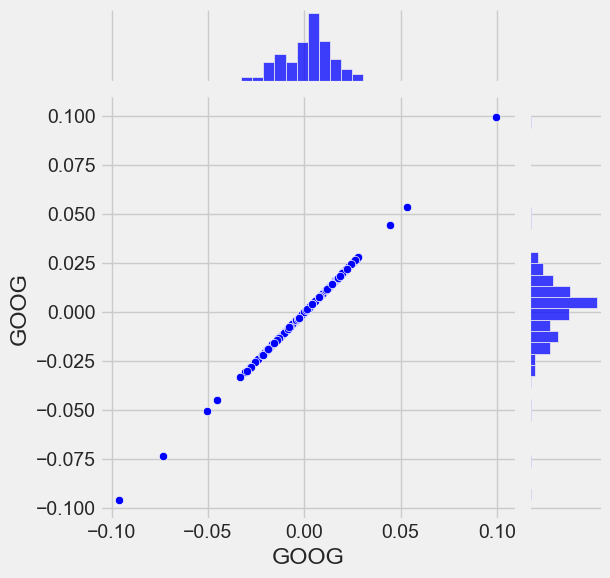

In [11]:
# To plot Google returns compared to itself:
sns.jointplot(x=tech_rets['GOOG'], y=tech_rets['GOOG'], kind='scatter', color='blue')

# To display the plot:
plt.show()

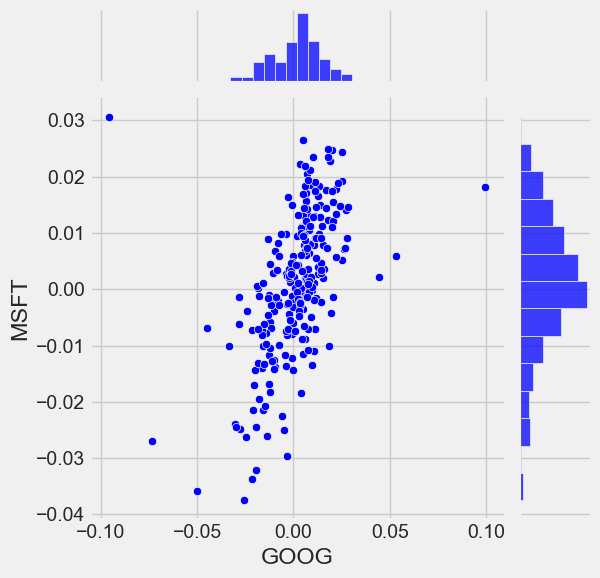

In [12]:
# To plot Google returns compared to Microsoft returns:
sns.jointplot(x=tech_rets['GOOG'], y=tech_rets['MSFT'], kind='scatter', color='b')

# To display the plot:
plt.show()

#### Observations: We can observe that if two stocks have a perfect positive correlation, their daily return values will exhibit a linear relationship.

<div align="justify">Seaborn and pandas simplify the process of performing this comparative analysis for every possible stock pair in our stock ticker list. By using sns.pairplot(), we can effortlessly generate these plots.</div>

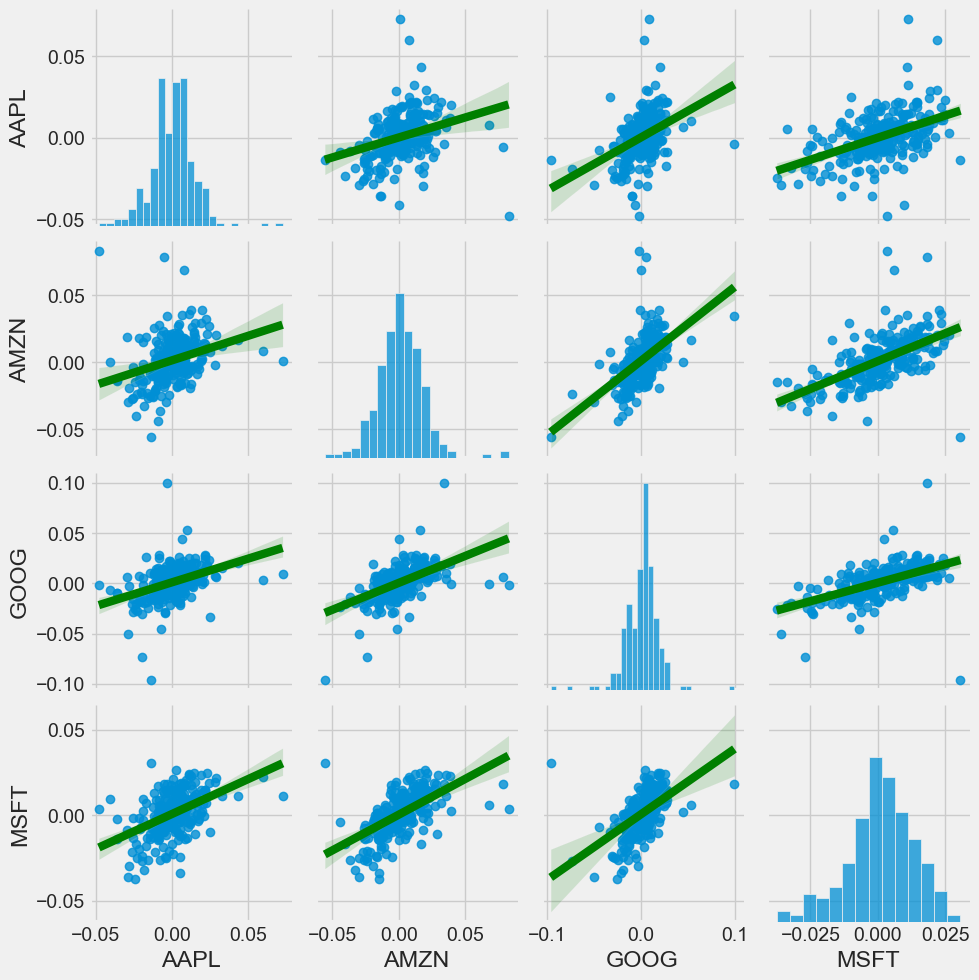

In [13]:
# To plot pairwise plot of daily returns with regression lines:
sns.pairplot(tech_rets, kind='reg', plot_kws={'line_kws': {'color': 'green'}})

# To display the plot:
plt.show()

#### Observations: From the above analysis, we can observe the relationships between daily returns for all the stocks. A notable correlation between Google and Amazon's daily returns stands out, which might be worth investigating further.

<div align="justify">While sns.pairplot() provides a convenient way to generate these plots, sns.PairGrid() offers more control over the figure. It allows us to customize the types of plots displayed on the diagonal, upper triangle, and lower triangle of the grid. Below is an example demonstrating how to leverage the full capabilities of Seaborn to achieve this customization.</div>

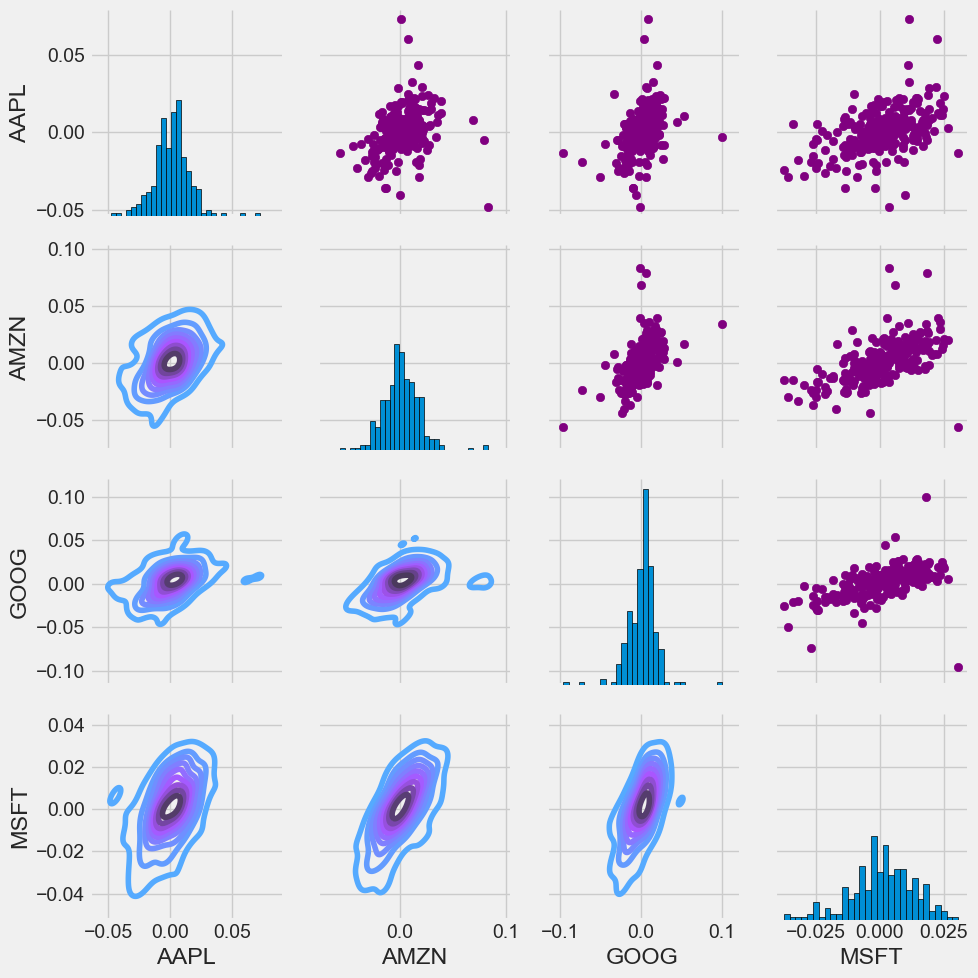

In [14]:
# To create a PairGrid object, dropping any NaN values:
return_fig = sns.PairGrid(tech_rets.dropna())

# To define the upper triangle as scatter plots:
return_fig.map_upper(plt.scatter, color='purple')

# To define the lower triangle with kernel density estimation (kde) plots:
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# To define the diagonal with histograms:
return_fig.map_diag(plt.hist, bins=30, edgecolor='black')

# To adjust layout to fit the plots:
plt.tight_layout()
plt.show()

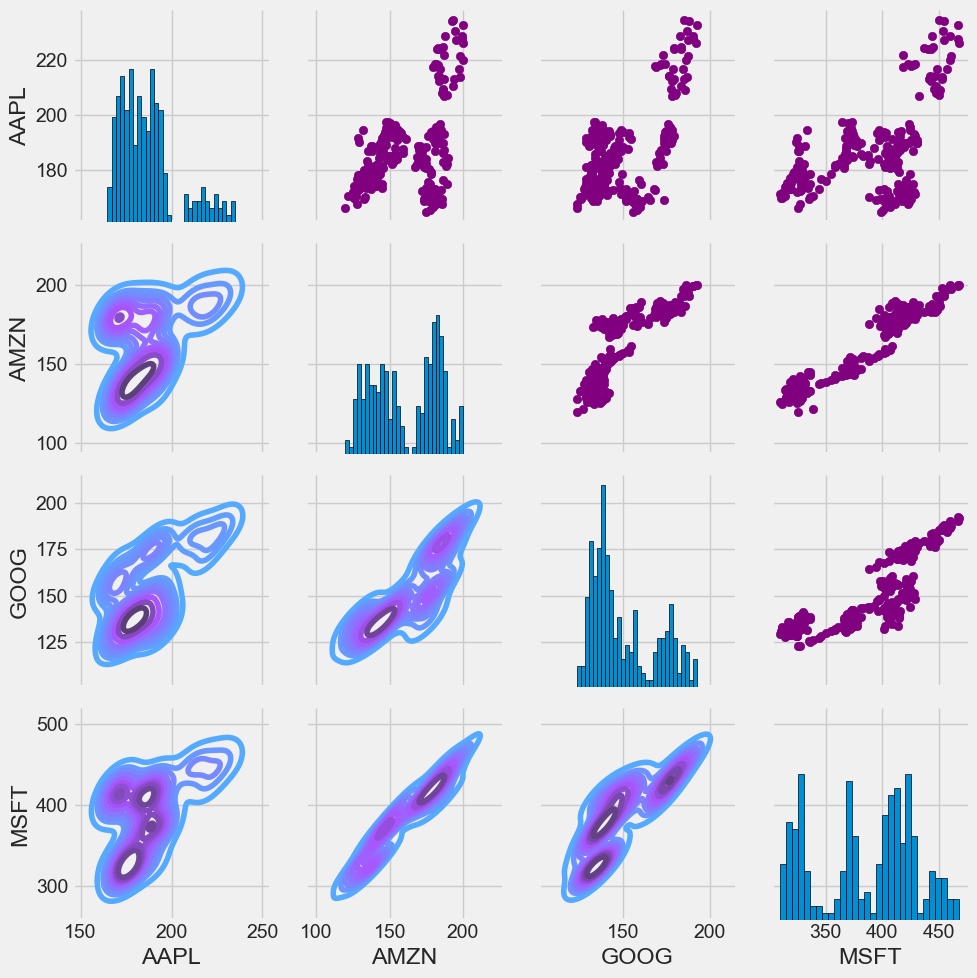

In [15]:
# To set up the PairGrid object with the closing prices DataFrame:
returns_fig = sns.PairGrid(closing_df)

# To map scatter plots to the upper triangle of the grid:
returns_fig.map_upper(plt.scatter, color='purple')

# To map kernel density estimation (KDE) plots to the lower triangle of the grid:
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# To map histograms to the diagonal of the grid:
returns_fig.map_diag(plt.hist, bins=30, edgecolor='black')

# To adjust layout to fit the plots:
plt.tight_layout()
plt.show()

<div align="justify">Eventually, we can create a correlation plot to obtain numerical values for the correlation between the stocks' daily return values. By examining the closing prices, we observe a noteworthy relationship between Microsoft and Apple.</div>

### Correlation Plot:

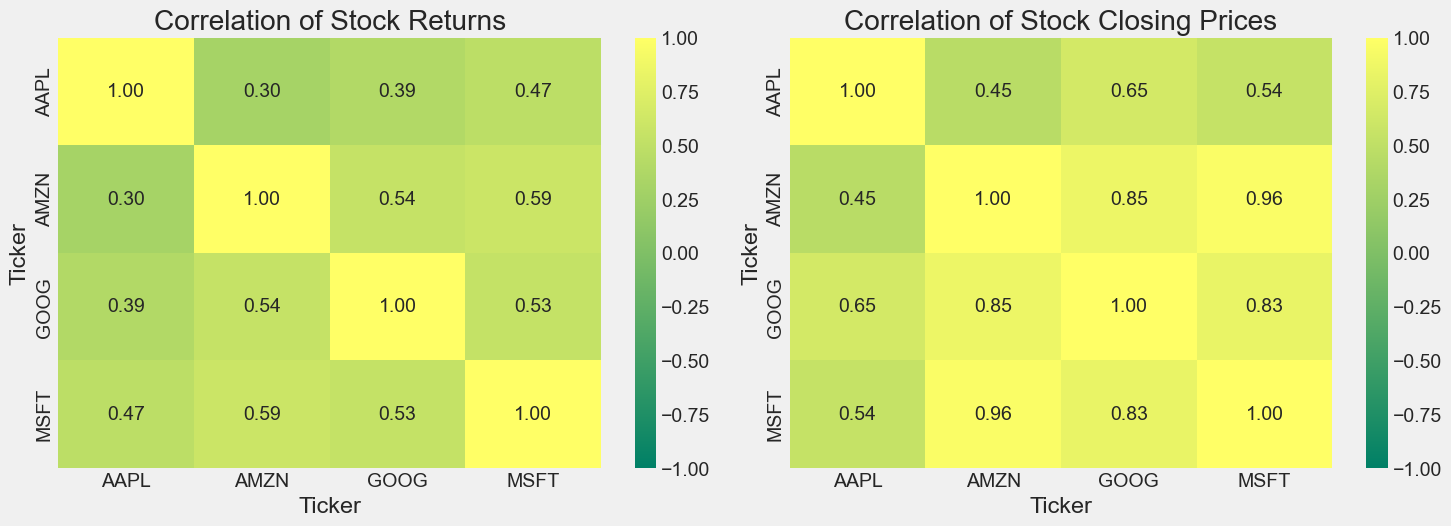

In [16]:
# To set up the figure size:
plt.figure(figsize=(15, 10))

# To plot the correlation matrix of stock returns:
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Stock Returns')

# To plot the correlation matrix of stock closing prices:
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Stock Closing Prices')

# To adjust layout to fit the plots:
plt.tight_layout()
plt.show()

#### Observations: Confirming our observations from the PairPlot, both numerically and visually, we see that Microsoft and Amazon exhibit the strongest correlation in their daily stock returns. It's also noteworthy that all the companies show a positive correlation with each other.

### Risk associate with particular stock:

<div align="justify">There are various methods to quantify risk, and one of the most fundamental approaches is to use the data on daily percentage returns. This involves comparing the expected return with the standard deviation of the daily returns.</div>

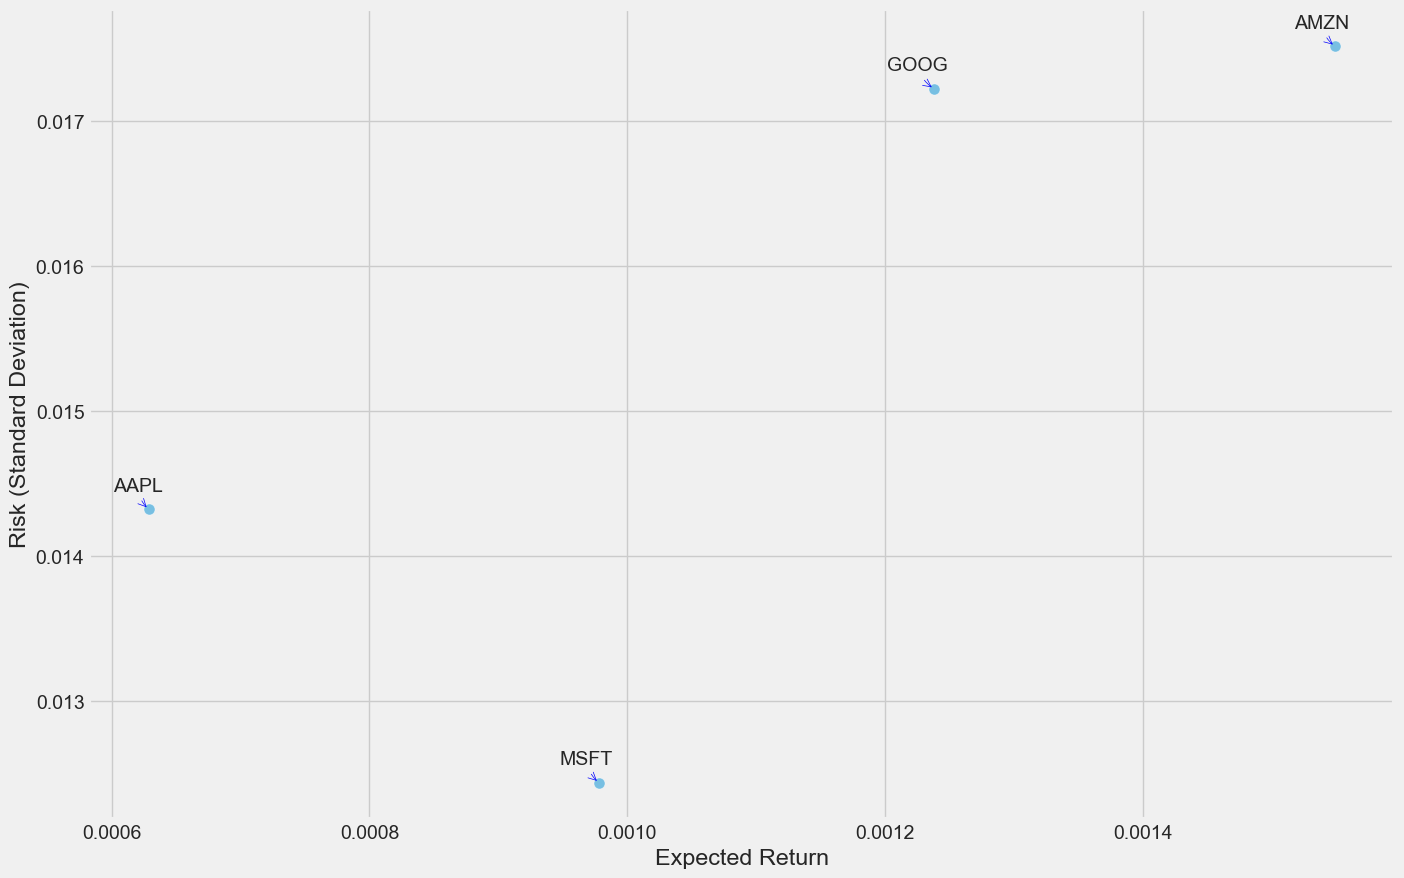

In [17]:
# To drop any NaN values from the returns DataFrame:
rets = tech_rets.dropna()

# To define the area of the scatter plot markers:
area = np.pi * 20

# To create the scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(rets.mean(), rets.std(), s=area, alpha=0.5, edgecolors='w', linewidth=0.5)

# To label the axes:
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

# To annotate each stock with its name:
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
                 xy=(x, y), 
                 xytext=(10, 10), 
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.2'))

# To add a grid for better readability:
plt.grid(True)

# To show the plot:
plt.show()


### To predict the closing price stock price of APPLE inc (Using LSTM):

In [18]:
# To fetch the stock data for Apple (AAPL):
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# To display the data:
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.416981   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.483714   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.622307   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.754259   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.734025   
...                ...         ...         ...         ...         ...   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.960007   
2024-07-29  216.960007  219.300003  215.750000  218.240005  218.240005   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.800003   
2024-07-31  221.440002  223.820007  220.630005  222.080002  222.080002   

               Volume  
Date         

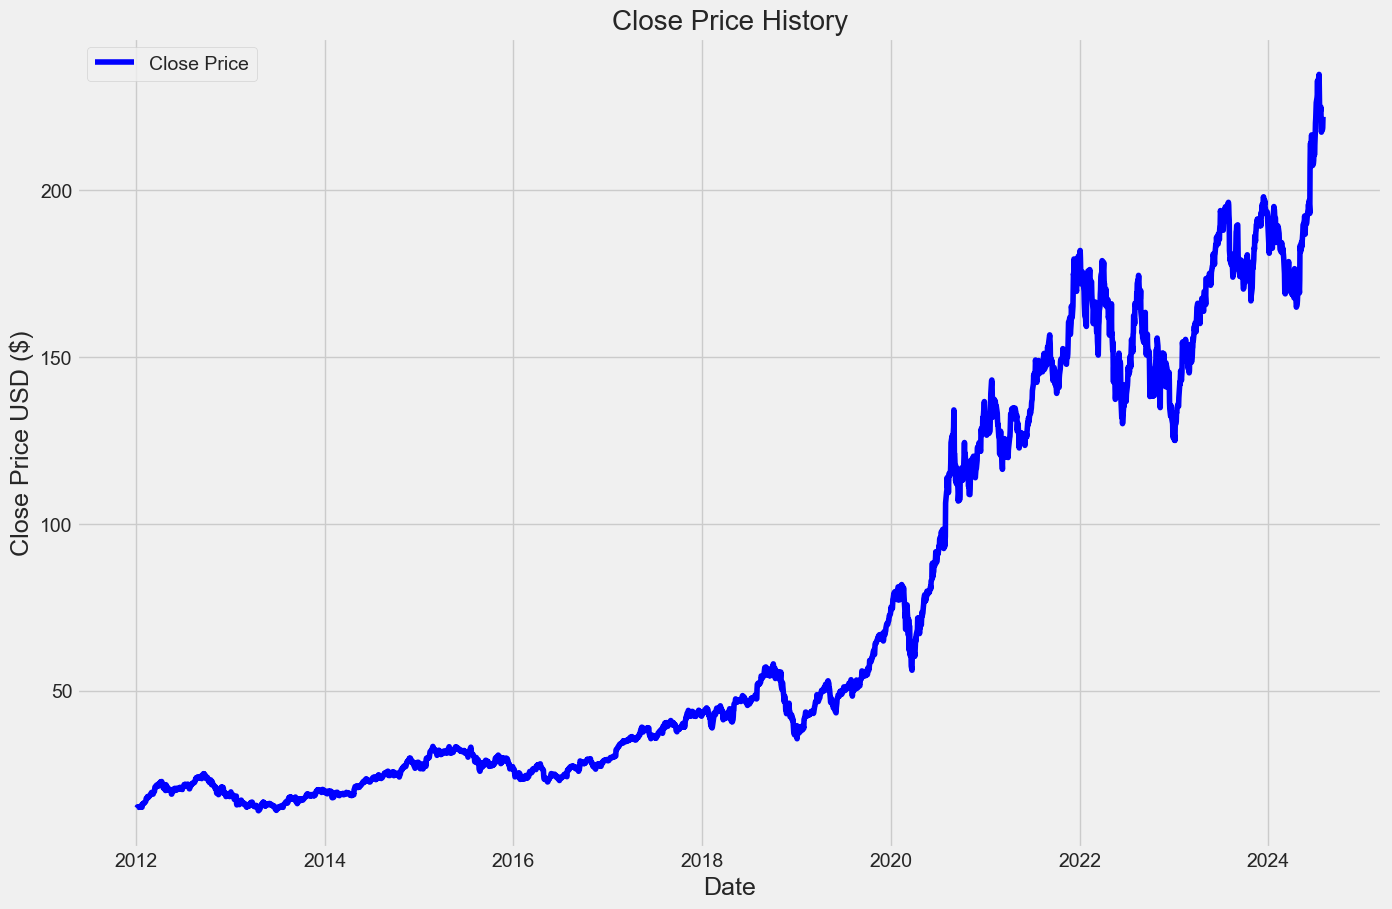

In [19]:
# To set up the figure size and title:
plt.figure(figsize=(15, 10))
plt.title('Close Price History', fontsize=20)

# To plot the closing prices:
plt.plot(df['Close'], label='Close Price', color='blue')

# To label the axes:
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# To improve layout and show the plot:
plt.grid(True)  # Add grid for better readability
plt.legend()    # Add a legend to identify the plot
plt.show()


In [20]:
# To create a new DataFrame with only the 'Close' column:
data = df[['Close']]

# To convert the DataFrame to a NumPy array:
dataset = data.values

# To calculate the number of rows to use for training:
training_data_len = int(np.ceil(len(dataset) * 0.95))

# To display the length of the training data:
print(f'Training data length: {training_data_len}')

Training data length: 3006


In [21]:
from sklearn.preprocessing import MinMaxScaler

# To create a MinMaxScaler object to scale data to the range [0, 1]:
scaler = MinMaxScaler(feature_range=(0, 1))

# To fit the scaler on the dataset and transform the data:
scaled_data = scaler.fit_transform(dataset)

# To display the scaled data (for preview):
print(scaled_data[:5])  # Print the first 5 rows to check the scaling


[[0.00334711]
 [0.00370446]
 [0.00444665]
 [0.00515326]
 [0.00504493]]


In [22]:
# To create the scaled training dataset:
train_data = scaled_data[0:int(training_data_len), :]

# To initialize lists for features and targets:
x_train = []
y_train = []

# To create sequences of 60 time steps and the corresponding target value:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 time steps
    y_train.append(train_data[i, 0])       # Target value

# To print the first few sequences and targets for verification:
if len(x_train) <= 2:  # Print only if there are a few sequences
    print("x_train:", x_train[:2])
    print("y_train:", y_train[:2])
    print()

# To convert lists to NumPy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

# To reshape x_train to be compatible with LSTM input shape (samples, time steps, features):
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# To display the shape of x_train for verification:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (2946, 60, 1)
y_train shape: (2946,)


In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# To build the LSTM model:
model = Sequential()

# To add the first LSTM layer with 128 units and return sequences for the next LSTM layer:
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# To add the second LSTM layer with 64 units:
model.add(LSTM(64, return_sequences=False))

# To add a Dense layer with 25 units:
model.add(Dense(25))

# To add the final Dense layer with 1 unit (output layer):
model.add(Dense(1))

# To compile the model with Adam optimizer and mean squared error loss function:
model.compile(optimizer='adam', loss='mean_squared_error')

# To train the model:
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1)

# To print model summary:
model.summary()


c:\Users\shish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2946/2946 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.0022


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [24]:
# To create the testing dataset:
# To extract scaled values for the test period:
test_data = scaled_data[training_data_len - 60:, :]

# To initialize lists for features and targets:
x_test = []
y_test = dataset[training_data_len:, :]

# To create sequences of 60 time steps for x_test:
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

# To convert lists to NumPy arrays:
x_test = np.array(x_test)

# To reshape x_test to be compatible with LSTM input shape (samples, time steps, features):
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# To make predictions with the trained model:
predictions = model.predict(x_test)

# To inverse transform the predictions to original scale:
predictions = scaler.inverse_transform(predictions)

# To calculate RMSE by comparing predictions with actual values:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# To print RMSE:
print("Root Mean Squared Error (RMSE):", rmse)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Root Mean Squared Error (RMSE): 16.190614529069478


C:\Users\shish\AppData\Local\Temp\ipykernel_29304\1837598318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


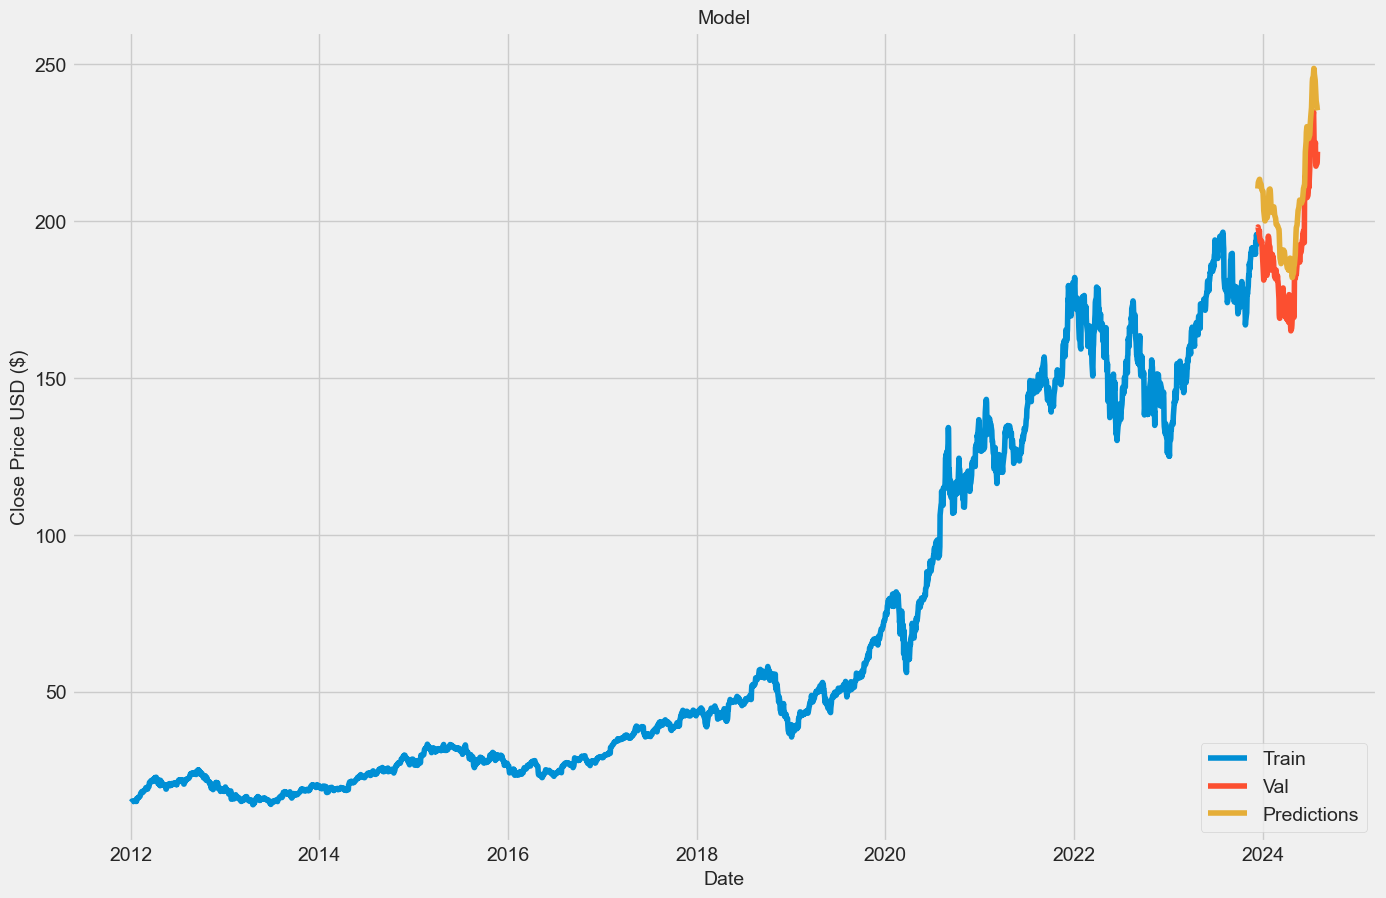

In [25]:
# To split the data into training and validation sets:
train = data[:training_data_len]
valid = data[training_data_len:]

# To add the predictions to the validation set:
valid['Predictions'] = predictions

# To plot figure:
plt.figure(figsize=(15, 10))
plt.title('Model', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)

# To plot the training data:
plt.plot(train.index, train['Close'], label='Train')

# To plot the validation data and predictions:
plt.plot(valid.index, valid['Close'], label='Val')
plt.plot(valid.index, valid['Predictions'], label='Predictions')

# To add a legend:
plt.legend(loc='lower right')

# To show the plot:
plt.show()

In [27]:
# To display the validation data with actual and predicted prices:
print(valid)

                 Close  Predictions
Date                               
2023-12-13  197.960007   210.339767
2023-12-14  198.110001   211.302902
2023-12-15  197.570007   212.316681
2023-12-18  195.889999   213.066833
2023-12-19  196.940002   213.232452
...                ...          ...
2024-07-25  217.490005   240.171127
2024-07-26  217.960007   238.199234
2024-07-29  218.240005   236.667908
2024-07-30  218.800003   235.691666
2024-07-31  222.080002   235.283676

[158 rows x 2 columns]


### Summary:
<div align="justify">In this notebook, we investigated and analyzed stock data. In particular, we learned:</div></br>

- How to retrieve stock market data from Yahoo Finance using the yfinance library
- How to examine and visualize time-series data with Pandas, Matplotlib, and Seaborn
- How to assess the correlation between different stocks
- How to evaluate the risk associated with investing in a specific stock
- How to predict stock prices

### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and seaborn for data visualization
- Pandas for data manipulation
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- Jupyter Notebook for interactive analysis

### References:
- Python documentations
- Exploratory Data Analysis
- Stack Overflow
- Kaggle
- Yahoo Finance

### Contact:
Created by https://github.com/Erkhanal - feel free to contact!